# Binary Confusion Matrix

---

Again, we will explore the Winsconsin Breast Cancer data, and dig deeper into the classification results. 🔍

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

np.random.seed(0)
X, y = load_breast_cancer(return_X_y=True)


**Q1**. Split your data into a training set of 80% of the data and a test set of 20%. Specify the `random_state` to 0 so that you get **reproducible** results.

In [3]:
# TODO: Split data
from sklearn.model_selection import train_test_split
#séparation 80% entrainement 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**Q2**. Fit a Logistic Regression on your data. Evaluate accuracy.

In [6]:
# TODO: Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Prédire les étiquettes pour l'ensemble de test
from sklearn.metrics import RocCurveDisplay,roc_auc_score
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)

# Évaluer la précision
precision = accuracy_score(y_test, y_pred)


In [10]:
y_pred = lr.predict(X_test) # prediction

In [11]:
y_pred_proba = lr.predict_proba(X_test)

In [12]:
y_pred_proba #proba de chacune de prédicition. A gauche 0 a droite 1

array([[9.89754593e-01, 1.02454069e-02],
       [2.30383649e-02, 9.76961635e-01],
       [3.11860605e-03, 9.96881394e-01],
       [2.17890502e-01, 7.82109498e-01],
       [1.75713877e-04, 9.99824286e-01],
       [3.37685509e-03, 9.96623145e-01],
       [4.02286932e-03, 9.95977131e-01],
       [2.31282097e-03, 9.97687179e-01],
       [9.99816880e-03, 9.90001831e-01],
       [5.26019401e-04, 9.99473981e-01],
       [4.69933595e-01, 5.30066405e-01],
       [1.17432041e-01, 8.82567959e-01],
       [2.45902595e-03, 9.97540974e-01],
       [8.22091747e-01, 1.77908253e-01],
       [1.99744977e-01, 8.00255023e-01],
       [9.97074053e-01, 2.92594679e-03],
       [8.04352331e-03, 9.91956477e-01],
       [9.99999997e-01, 2.67540523e-09],
       [9.97028158e-01, 2.97184250e-03],
       [1.00000000e+00, 2.39508141e-12],
       [9.99956662e-01, 4.33380137e-05],
       [8.97977891e-01, 1.02022109e-01],
       [3.20691160e-03, 9.96793088e-01],
       [1.26512107e-02, 9.87348789e-01],
       [9.923189

In [13]:
accuracy_score(y_pred, y_test)

0.9473684210526315

In [14]:
AUC = roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])

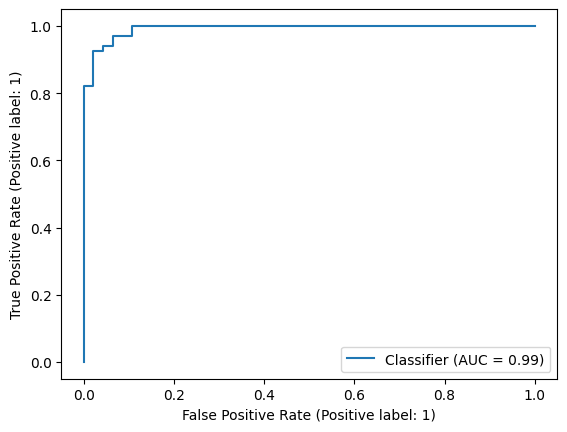

In [17]:
import matplotlib.pyplot as plt
y_pred = lr.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred) #RocCurve
plt.show()

**Q3**. Now we want to understand better the performance than just the global accuracy. Explore the function `confusion_matrix` of scikit_learn, and use it to display the confusion matrix of your model.

In [19]:

y_pred = lr.predict(X_test)


In [37]:
y_true = y_test
y_pred = lr.predict(X_test)

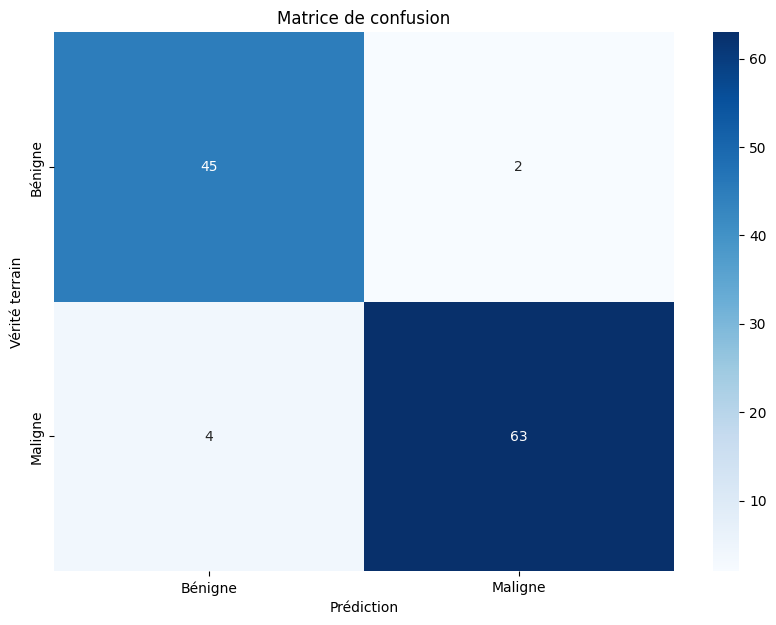

In [44]:
# TODO: Confusion matrix
#entrainement
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la matrice de confusion
matrice_confusion = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec Seaborn pour une meilleure lisibilité
plt.figure(figsize=(10, 7))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bénigne", "Maligne"],
            yticklabels=["Bénigne", "Maligne"])
plt.title("Matrice de confusion")
plt.ylabel("Vérité terrain")
plt.xlabel("Prédiction")
plt.show()



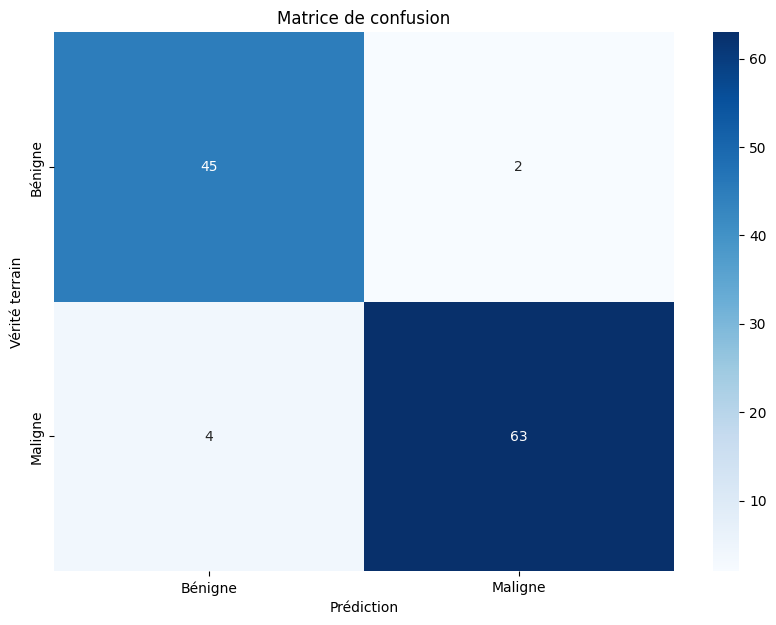

(63, 45, 2, 4)

In [45]:
# Import des bibliothèques et calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la matrice de confusion
matrice_confusion = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bénigne", "Maligne"],
            yticklabels=["Bénigne", "Maligne"])
plt.title("Matrice de confusion")
plt.ylabel("Vérité terrain")
plt.xlabel("Prédiction")
plt.show()

# Extraction des valeurs de TP, TN, FP et FN
TP = matrice_confusion[1, 1]
TN = matrice_confusion[0, 0]
FP = matrice_confusion[0, 1]
FN = matrice_confusion[1, 0]

TP, TN, FP, FN


**Q4**. Before analyzing it. Let's visualize it more properly (with color, axes label etc.).

- Display the confusion matrix in a more visual way with seaborn library
- Verify that your axes are correct

In [ ]:
# TODO: Confusion matrix with seaborn


**Q5**. Compute by hand Precision, Recall and F1_score

In [30]:
y_true = y_test
y_pred = lr.predict(X_test)

In [46]:
# TODO: Classificaiton metrics
#Positif = 1 Negatif = 0
TP = 63
TN = 45
FP = 2
FN = 4


In [47]:

precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

In [48]:
#avec sickit learn
sklearn_recall = recall_score(y_pred, y_true)
sklearn_accuracy = accuracy_score(y_pred, y_true)
sklearn_f1 = f1_score(y_pred, y_true)

In [49]:
print(f"We can compute the recall and recall the same way :")
print(f"{accuracy=:2f} & {sklearn_accuracy=:2f}")
print(f"{recall=:2f} & {sklearn_recall=:2f}")
print(f"{f1=:2f} & {sklearn_f1=:2f}")

We can compute the recall and recall the same way :
accuracy=0.947368 & sklearn_accuracy=0.947368
recall=0.940299 & sklearn_recall=0.969231
f1=0.954545 & sklearn_f1=0.954545


**Q6**. Again, there is a built-in function in scikit-learn in order to compute those scores easily.

It is called `classification_report`. Use it and compare with your previous numbers.

In [50]:
# TODO: classification_report
from sklearn.metrics import classification_report

# Assurez-vous d'avoir les vraies étiquettes (y_true) et les prédictions (y_pred) correctement définies
y_true = y_test  # y_test est votre ensemble d'étiquettes de test
y_pred = lr.predict(X_test)  # Utilisez la méthode de prédiction de votre modèle avec les caractéristiques de test (X_test)

# Utilisation de classification_report pour obtenir un rapport de classification
report = classification_report(y_true, y_pred, target_names=["Bénigne", "Maligne"])

print(report)


              precision    recall  f1-score   support

     Bénigne       0.92      0.96      0.94        47
     Maligne       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



**Q7**. Plot the ROC curve and compute the AUC (Area Under the Curve).
Don't hesitate to use scikit-learn

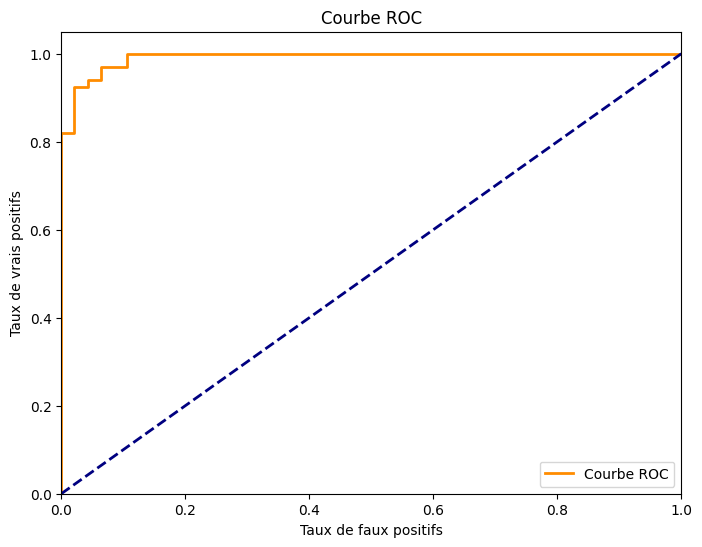

In [51]:
# TODO: Plot the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcul des probabilités prédites pour la classe positive (classe maligne)
probas = lr.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, probas)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [52]:
# TODO: Compute the Area Under the Curve Score
from sklearn.metrics import roc_auc_score

# Calcul des probabilités prédites pour la classe positive (classe maligne)
probas = lr.predict_proba(X_test)[:, 1]

# Calcul de l'AUC (Area Under the Curve)
auc = roc_auc_score(y_test, probas)

# Afficher le score AUC
print(f"Score de l'Aire sous la courbe (AUC) : {auc:.2f}")


Score de l'Aire sous la courbe (AUC) : 0.99


**Q8**. How would you analyze your model performance?

In [ ]:
# TODO: classification_report


Courbe ROC et AUC : La courbe ROC et l'AUC permettent d'évaluer la capacité de votre modèle à discriminer entre les classes. Une courbe ROC proche du coin supérieur gauche et une AUC élevée indiquent une meilleure performance.